In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [3]:
listing=pd.read_csv('C:/Users/Orbit/Desktop/python/seattle/listings.csv')
#listing.columns
ld = listing.loc[:,['id','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic',
'neighbourhood_cleansed','property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 
'bed_type', 'amenities', 'price', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights',
 'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_communication','instant_bookable','cancellation_policy'
]]
ld.shape

(3818, 28)

In [4]:
calendar=pd.read_csv('C:/Users/Orbit/Desktop/python/seattle/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
calendar['year'] = pd.DatetimeIndex(calendar.date).year
calendar['month'] = pd.DatetimeIndex(calendar.date).month
#calendar['day'] = pd.DatetimeIndex(calendar.date).day

In [6]:
#ld['host_since_year']= pd.DatetimeIndex(ld.host_since).year


In [7]:
#ld['host_since_year']

In [8]:
calendar=calendar.drop('date', axis=1)

In [9]:
merged = pd.merge(ld,
                 calendar,
                left_on='id',
                right_on='listing_id',
                 how='left')

In [11]:
merged=merged.drop(['listing_id', 'price_x','id'], axis=1)

In [12]:
merged.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_communication,instant_bookable,cancellation_policy,available,price_y,year,month
0,96%,100%,f,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,f,moderate,t,$85.00,2016,1
1,96%,100%,f,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,f,moderate,t,$85.00,2016,1
2,96%,100%,f,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,f,moderate,f,NaN,2016,1
3,96%,100%,f,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,f,moderate,f,NaN,2016,1
4,96%,100%,f,t,West Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,...,95.0,10.0,10.0,10.0,f,moderate,f,NaN,2016,1


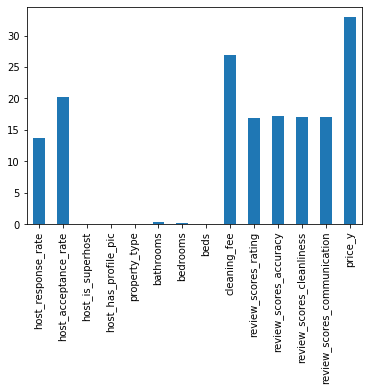

In [13]:
merged_missing_cols = merged.isnull().mean()*100
listing_nan=merged_missing_cols[merged_missing_cols>0]
listing_nan.plot(kind='bar', legend=False)

In [14]:
merged[['price_y','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic']]

,price_y,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic
0,$85.00,96%,100%,f,t
1,$85.00,96%,100%,f,t
2,NaN,96%,100%,f,t
3,NaN,96%,100%,f,t
4,NaN,96%,100%,f,t
...,...,...,...,...,...
1393565,NaN,100%,NaN,f,t
1393566,NaN,100%,NaN,f,t
1393567,NaN,100%,NaN,f,t
1393568,NaN,100%,NaN,f,t


In [15]:
merged['property_type'].isnull().mean()

0.00026191723415400735

Text(0.5, 1.0, 'Top 10 Neighbourhood_cleansed per listings count')

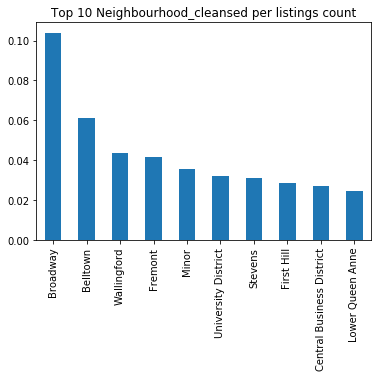

In [56]:
#Data vizualisation
#ld[['neighbourhood', 'neighbourhood_cleansed']]
(ld.neighbourhood_cleansed.value_counts()[:10]/ld.shape[0]).plot(kind='bar')
plt.title('Top 10 Neighbourhood_cleansed per listings count')

In [17]:
#Data Cleaning
merged['price']=merged.price_y.str.replace('[\$,]', '').astype('float64')
merged['cleaning_fee']=merged.cleaning_fee.str.replace('[\$,]', '').astype('float64')
merged['extra_people']=merged.extra_people.str.replace('[\$,]', '').astype('float64')

In [18]:
merged['host_acceptance_rate'] = merged.host_acceptance_rate.replace('%','',regex=True).astype('float64')/100.00
merged['host_response_rate'] = merged.host_response_rate.replace('%','',regex=True).astype('float64')/100.00

In [19]:
merged['host_has_profile_pic'].replace('t',1, inplace=True)
merged['host_has_profile_pic'].replace('f',0, inplace=True)

merged['host_is_superhost'].replace('t',1, inplace=True)
merged['host_is_superhost'].replace('f',0, inplace=True)

merged['instant_bookable'].replace('t',1, inplace=True)
merged['instant_bookable'].replace('f',0, inplace=True)

In [20]:
merged['host_has_profile_pic']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
1393565    1.0
1393566    1.0
1393567    1.0
1393568    1.0
1393569    1.0
Name: host_has_profile_pic, Length: 1393570, dtype: float64

In [21]:
merged[['price','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic']]

,price,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic
0,85.0,0.96,1.0,0.0,1.0
1,85.0,0.96,1.0,0.0,1.0
2,NaN,0.96,1.0,0.0,1.0
3,NaN,0.96,1.0,0.0,1.0
4,NaN,0.96,1.0,0.0,1.0
...,...,...,...,...,...
1393565,NaN,1.00,NaN,0.0,1.0
1393566,NaN,1.00,NaN,0.0,1.0
1393567,NaN,1.00,NaN,0.0,1.0
1393568,NaN,1.00,NaN,0.0,1.0


In [22]:
#fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
#ld['property_type'] = ld['property_type'].apply(fill_mean)
#merged['property_type'].fillna('Boat', inplace=True)
merged=merged.dropna(subset=['property_type'], axis=0)

In [23]:
'''
def recode(value):
      
    if value in ('House'):    #('House', 'Apartment', 'Touwnhouse', 'Condominium'):
        return 1
    elif value in ('Apartment'):
        return 2
    elif value in ('Touwnhouse'):
        return 3
    elif value in ('Condominium'):
        return 4
    else:
        return 5
    
merged['property_type']=merged['property_type'].apply(recode)
'''

"\ndef recode(value):\n      \n    if value in ('House'):    #('House', 'Apartment', 'Touwnhouse', 'Condominium'):\n        return 1\n    elif value in ('Apartment'):\n        return 2\n    elif value in ('Touwnhouse'):\n        return 3\n    elif value in ('Condominium'):\n        return 4\n    else:\n        return 5\n    \nmerged['property_type']=merged['property_type'].apply(recode)\n"

In [24]:
def recode(value):
      
    if value  in ('Real Bed'):
        return 1
    else:
        return 2
    
merged['bed_type']=merged["bed_type"].apply(recode) 

In [25]:
merged.loc[:,'amenities_length'] = merged['amenities'].str.len()
merged.drop(['amenities'], axis=1, inplace=True)


In [26]:
merged=merged.drop('price_y', axis=1)

In [27]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393205 entries, 0 to 1393569
Data columns (total 30 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   host_response_rate           1202310 non-null  float64
 1   host_acceptance_rate         1111060 non-null  float64
 2   host_is_superhost            1392475 non-null  float64
 3   host_has_profile_pic         1392475 non-null  float64
 4   neighbourhood_cleansed       1393205 non-null  object 
 5   property_type                1393205 non-null  object 
 6   room_type                    1393205 non-null  object 
 7   accommodates                 1393205 non-null  int64  
 8   bathrooms                    1387365 non-null  float64
 9   bedrooms                     1391015 non-null  float64
 10  beds                         1392840 non-null  float64
 11  bed_type                     1393205 non-null  int64  
 12  cleaning_fee                 1017255 non-n

In [28]:
merged['available'].replace('t',1, inplace=True)
merged['available'].replace('f',0, inplace=True)

In [33]:
categories=merged.select_dtypes(include=['object'])
categories

#ld.neighbourhood.unique()

,neighbourhood_cleansed,property_type
0,West Queen Anne,Apartment
1,West Queen Anne,Apartment
2,West Queen Anne,Apartment
3,West Queen Anne,Apartment
4,West Queen Anne,Apartment
...,...,...
1393565,East Queen Anne,Apartment
1393566,East Queen Anne,Apartment
1393567,East Queen Anne,Apartment
1393568,East Queen Anne,Apartment


In [30]:
ld['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [62]:
fill_ld1[['price','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic']]

,price,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic
0,85.0,0.96,1.000000,0.0,1.0
1,85.0,0.96,1.000000,0.0,1.0
9,85.0,0.96,1.000000,0.0,1.0
10,85.0,0.96,1.000000,0.0,1.0
14,85.0,0.96,1.000000,0.0,1.0
...,...,...,...,...,...
1393207,87.0,1.00,0.999522,0.0,1.0
1393208,87.0,1.00,0.999522,0.0,1.0
1393211,87.0,1.00,0.999522,0.0,1.0
1393212,87.0,1.00,0.999522,0.0,1.0


In [31]:
def recode(value):
      
    if value  in ('flexible'):
        return 1
    elif value in ('moderate'):
        return 2
    else:
        return 3
    
merged['cancellation_policy']=merged["cancellation_policy"].apply(recode)

In [32]:
def recode(value):
      
    if value  in ('Entire home/apt'):
        return 1
    elif value in ('Private room'):
        return 2
    else:
        return 3
    
merged['room_type']=merged["room_type"].apply(recode)

In [ ]:
#merged1=merged.drop(['neighbourhood', 'date'], axis=1)

In [36]:
#Pull a list of the column names of the categorical variables

cat_cols_lst = categories.columns

def create_dummy_df(merged, categories, dummy_na):
    for col in  categories:
        try:
            # for each cat add dummy var, drop original column
            merged = pd.concat([merged.drop(col, axis=1), pd.get_dummies(ld[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return merged


In [ ]:
merged.head()

In [ ]:
#numerics=merged_new.select_dtypes(include=['float64', 'int64'])
#numerics

In [38]:
merged_new = create_dummy_df(merged, cat_cols_lst, dummy_na=False) #Use your newly created function
merged_new.head()


,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt
0,0.96,1.0,0.0,1.0,1,4,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.96,1.0,0.0,1.0,1,4,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.96,1.0,0.0,1.0,1,4,1.0,1.0,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.96,1.0,0.0,1.0,1,4,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.96,1.0,0.0,1.0,1,4,1.0,1.0,1.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
merged_new = merged_new.dropna(subset=['price'], axis=0)
#merged1.isnull().sum()


In [40]:
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_ld1 = merged_new.apply(fill_mean, axis=0)

In [41]:
#fill_ld1.isnull().sum()>0==True
#fill_ld1.columns
no_nulls = set(fill_ld1.columns[fill_ld1.isnull().mean()>0])
no_nulls

set()

In [42]:
#merged=pd.concat([nums, categories], axis=1)

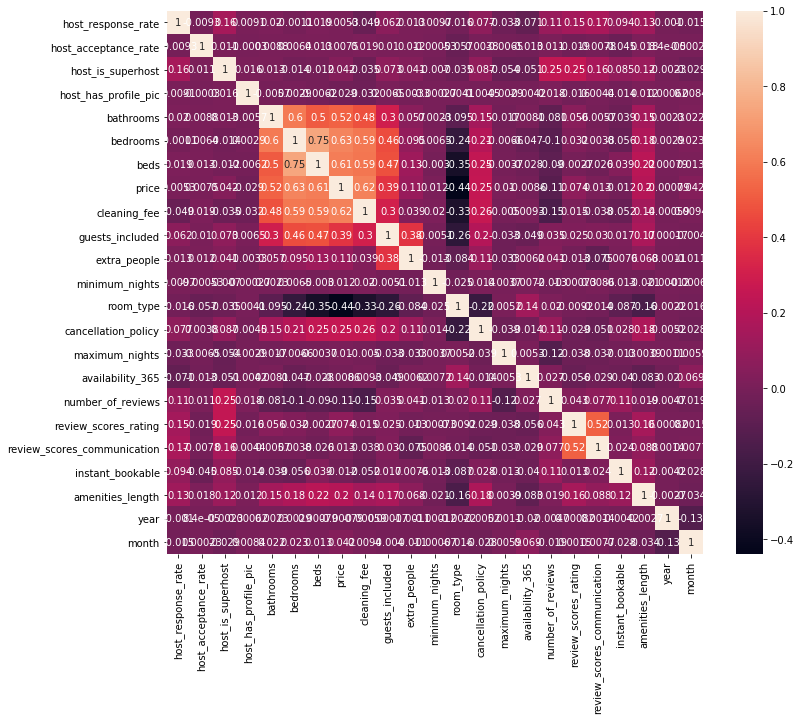

In [44]:
a=fill_ld1.loc[:,['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'bathrooms', 'bedrooms', 'beds', 'price','cleaning_fee', 'guests_included', 
        'extra_people', 'minimum_nights','room_type','cancellation_policy',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_communication', 'instant_bookable',
       'amenities_length', 'year', 'month']]

fig, ax = plt.subplots(figsize=(12,10))         
sns.heatmap(a.corr(),annot=True, ax=ax)

bedrooms                       0.631666
cleaning_fee                   0.619877
beds                           0.608821
bathrooms                      0.524902
room_type                      0.439049
guests_included                0.386767
cancellation_policy            0.254047
amenities_length               0.204298
number_of_reviews              0.108867
extra_people                   0.107328
review_scores_rating           0.074005
host_is_superhost              0.042446
month                          0.041889
host_has_profile_pic           0.028644
review_scores_communication    0.012819
Name: price, dtype: float64


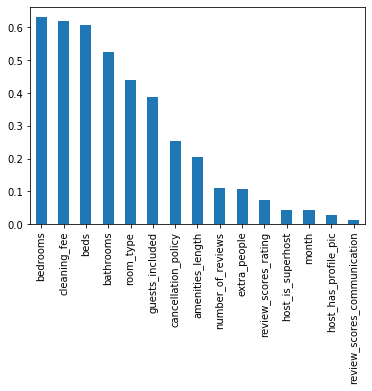

In [45]:
corr=a.corr()
#np.fill_diagonal(corr.values, np.nan)
print(corr['price'].abs().sort_values(ascending=False)[1:16])
corr1=corr['price'].abs().sort_values(ascending=False)[1:16]
corr1.plot(kind='bar') 
#corr1.columns

review_scores_communication    0.518905
host_is_superhost              0.247035
amenities_length               0.156447
host_response_rate             0.148676
price                          0.074005
Name: review_scores_rating, dtype: float64


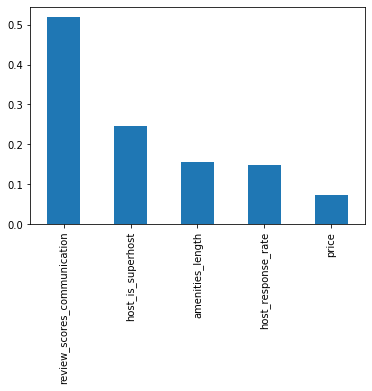

In [46]:
corr=a.corr()
#np.fill_diagonal(corr.values, np.nan)
print(corr['review_scores_rating'].abs().sort_values(ascending=False)[1:6])
                                                                      
corr1=corr['review_scores_rating'].abs().sort_values(ascending=False)[1:6]
corr1.plot(kind='bar')

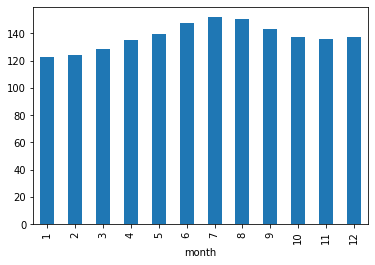

In [59]:
merged.groupby(['month']).mean()['price'].plot(kind='bar')

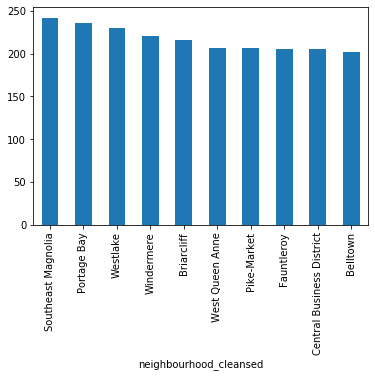

In [60]:
merged.groupby(['neighbourhood_cleansed']).mean()['price'].sort_values(ascending=False)[:10].plot(kind='bar')
#df.loc[df['A'] == 'foo']

In [ ]:
merged.groupby(['month'])['price'].mean().sort_values(ascending=False).plot(kind='bar')

In [ ]:
merged.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean().sort_values(ascending=False)[:10].plot(kind='bar')

In [47]:
X=fill_ld1.drop('price', axis=1)
#X=fill_ld1.drop('price','neighbourhood', axis=1)

y=fill_ld1['price']

In [ ]:
#X=fill_ld1.drop('price', axis=1)
X=fill_ld1[['id','host_response_rate', 'host_acceptance_rate', 'host_is_superhost','host_has_profile_pic',
'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 
'bed_type', 'amenities_length',  'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights',
 'availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_communication','instant_bookable','cancellation_policy']]
y=fill_ld1['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

LinearRegression(normalize=True)

In [49]:
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.6021377385321779 on 280270 values.'

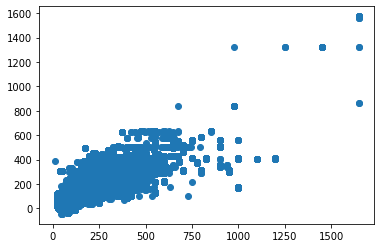

In [50]:
plt.scatter(y_test, y_test_preds)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train) #Fit

RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
from sklearn import metrics

y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)


print('Random Forest R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_preds),
        r2_score(y_test, y_test_preds)))

mse = np.sqrt(metrics.mean_squared_error(y_test, y_test_preds))
print(mse)

Random Forest R^2 train: 0.984, test: 0.982
14.092666043113729


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.21)
